(test-functions:alemazkoor-2d)=
# Two-dimensional Function from Alemazkoor and Meidani (2018)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The test function from {cite}`Alemazkoor2018` (or `Alemazkoor2D` for short)
is a two-dimensional polynomial function.
It was used as a test function for
a metamodeling exercise (i.e., sparse polynomial chaos expansion).
The function features a low-dimensional polynomial function (two-dimensional)
with a high degree (a total degree of $20$); in other words, the function
is low in dimension but of high-degree.

The surface and contour plots of the `Alemazkoor2D` function are shown below.

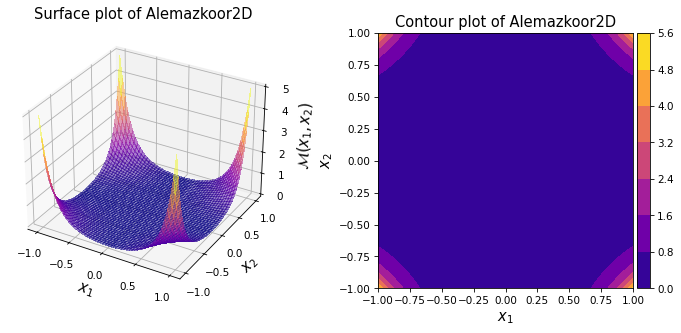

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

my_fun = uqtf.Alemazkoor2D()

# --- Create 2D data
xx_1d = np.linspace(-1, 1, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(10, 5))

# Surface
axs_1 = plt.subplot(121, projection='3d')
axs_1.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_1.set_xlabel("$x_1$", fontsize=14)
axs_1.set_ylabel("$x_2$", fontsize=14)
axs_1.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_1.set_title("Surface plot of Alemazkoor2D", fontsize=14)

# Contour
axs_2 = plt.subplot(122)
cf = axs_2.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_title("Contour plot of Alemazkoor2D", fontsize=14)
divider = make_axes_locatable(axs_2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_2.axis('scaled')

fig.tight_layout(pad=4.0)
plt.gcf().set_dpi(75);

## Test function instance

To create a default instance of the `Alemazkoor2D` function:

In [3]:
my_testfun = uqtf.Alemazkoor2D()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : Alemazkoor2D
Spatial dimension : 2
Description       : Low-dimensional high-degree polynomial from Alemazkoor & Meidani (2018)


## Description

The `Alemazkoor2D` function is defined as follows:

$$
\mathcal{M}(\boldsymbol{x}) = \sum_{i = 1}^{5} x_1^{2i} x_2^{2i}
$$

where $\boldsymbol{x} = \{ x_1, x_2 \}$
is the two-dimensional vector of input variables further defined below.

## Probabilistic input

Based on {cite}`Alemazkoor2018`, the probabilistic input model
for the function consists of two independent random variables as shown below.

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='uniform', parameters=array([-1,  1]), name='X1', description='None'), UnivDist(distribution='uniform', parameters=array([-1,  1]), name='X2', description='None')), copulas=None, name='2D-Alemazkoor2018', description='Input specification for the 2D test function from Alemazkoor & Meidani (2018)')

## Reference results

This section provides several reference results of typical UQ analyses
involving the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

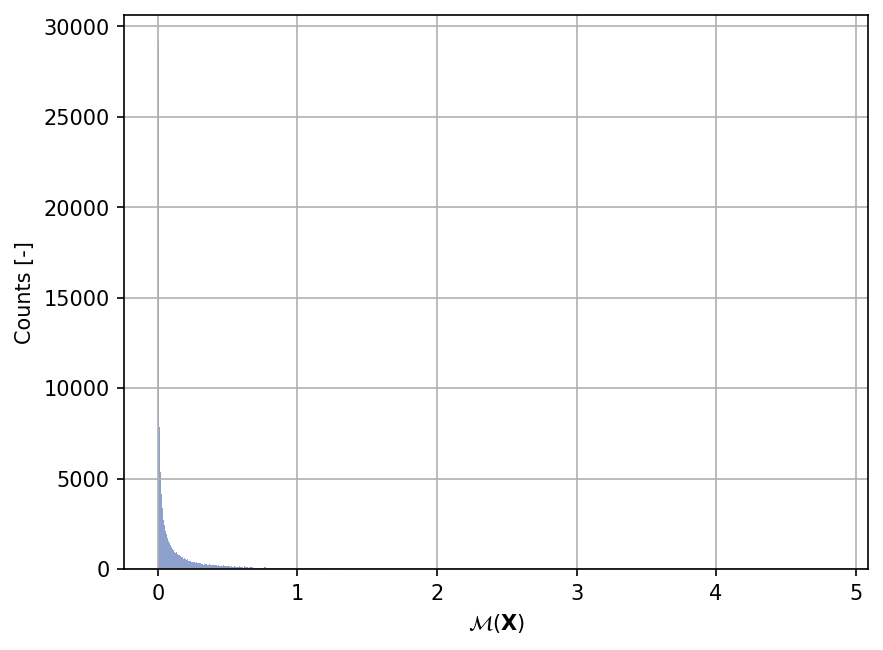

In [6]:
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Section 4.2, Eq. (33) in {cite}`Alemazkoor2018`.